In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
!pip install https://github.com/elyase/geotext/archive/master.zip

     | 2.3 MB 4.5 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for geotext: filename=geotext-0.3.0-py2.py3-none-any.whl size=2272468 sha256=5417ebc93e7d452d379cf1a2dbe546cb89ca3a6a02ecffe06e8a7a04b1d427e5
  Stored in directory: /tmp/pip-ephem-wheel-cache-34_iur79/wheels/78/d7/c7/cb79600aaee4389b4255a5b508ccdf6102122ef509bc2f745d
Successfully built geotext


In [12]:
# Install necessary libraries
!pip install transformers beautifulsoup4 requests gensim geopandas matplotlib

# Import necessary libraries
from transformers import pipeline
import requests
from bs4 import BeautifulSoup
from geotext import GeoText
import gensim
from gensim import corpora
from datetime import datetime
import geopandas as gpd
import matplotlib.pyplot as plt

--2024-10-18 20:14:12--  https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
Resolving naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)... 52.92.130.161, 52.92.179.33, 52.218.222.43, ...
Connecting to naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)|52.92.130.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip’

ne_110m_admin_0_cou 100%[===================>] 209.94K   367KB/s    in 0.6s    

2024-10-18 20:14:13 (367 KB/s) - ‘ne_110m_admin_0_countries.zip’ saved [214976/214976]

Archive:  ne_110m_admin_0_countries.zip
  inflating: ne_110m_admin_0_countries.README.html  
 extracting: ne_110m_admin_0_countries.VERSION.txt  
 extracting: ne_110m_admin_0_countries.cpg  
  inflating: ne_110m_admin_0_countries.dbf  
  inflating: ne_110m_admin_0_countries.prj  
  inflating: ne_110m_admin_0_countries.shp  
  inflating: ne_110m_admin_0_countr

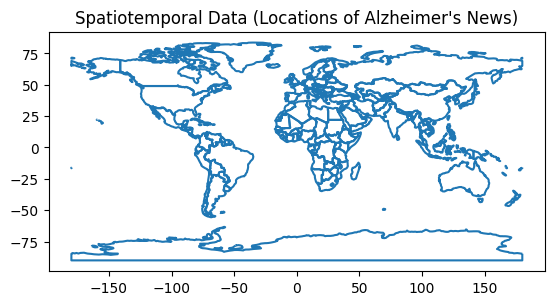

In [18]:
import geopandas as gpd
from shapely.geometry import Point

# Download the Natural Earth dataset
!wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip

# Load the dataset into GeoPandas
world = gpd.read_file("ne_110m_admin_0_countries.shp")

def plot_spatiotemporal_data(spatial_data):
    fig, ax = plt.subplots(1, 1)
    world.boundary.plot(ax=ax)

    # Simulate plotting locations
    for i, cities in enumerate(spatial_data):
        for city in cities:
            print(f"Plotting {city} from article {i+1}")
            # In a real implementation, you'd geocode city names to plot coordinates on the map
            # Example: You could use geopy to convert city names to latitude/longitude and plot here.

    plt.title("Spatiotemporal Data (Locations of Alzheimer's News)")
    plt.show()

# Example usage:
plot_spatiotemporal_data(spatial_data)


In [7]:
# Step 1: Initialize the summarization pipeline using the Falconsai model
pipe = pipeline("summarization", model="Falconsai/text_summarization")

# Initialize data structures to store news data
saved_news = []
summaries = []
spatial_data = []
temporal_data = []

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [8]:
def request_summarization(content):
    print("Summarizing content using Falconsai/text_summarization...")

    # Generate the summary using the pipeline
    summary = pipe(content, max_length=512, min_length=30, do_sample=False)[0]['summary_text']

    return summary

In [11]:
def fetch_news_content(url):
    print(f"Fetching content from {url}...")
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    paragraphs = soup.find_all('p')
    content = ' '.join([para.get_text() for para in paragraphs])
    return content[:2000]  # Lim

In [10]:
def search_and_save_news():
    print("Searching for the latest news articles about Alzheimer’s disease...")

    urls = [
        "https://www.alz.org/news",
        "https://www.mayoclinic.org/diseases-conditions/alzheimers-disease/news",
        "https://www.bbc.com/news/topics/c52ew7kze47t/alzheimers-disease",
        "https://www.nih.gov/news-events/news-releases/nih-funded-researchers-discover-new-insights-alzheimers-disease"
    ]

    saved_news = []
    for url in urls:
        try:
            response = requests.get(url)
            if response.status_code == 200:
                saved_news.append(url)
        except Exception as e:
            print(f"Error fetching {url}: {e}")

    print(f"Found {len(saved_news)} news URLs.")
    return saved_news

In [13]:
def summarize_news(saved_news):
    summaries = []
    for url in saved_news:
        content = fetch_news_content(url)
        summary = request_summarization(content)  # Use the Falconsai model to summarize content
        if summary:
            summaries.append(summary)
    return summaries

In [14]:
def extract_spatiotemporal_data(summaries):
    spatial_data = []
    temporal_data = []

    for summary in summaries:
        # Simulate temporal extraction (use current date)
        temp_date = datetime.now().strftime('%Y-%m-%d')
        temporal_data.append(temp_date)

        # Use GeoText to extract place names
        places = GeoText(summary)
        spatial_data.append(places.cities)

    print("Spatiotemporal data extracted.")
    return temporal_data, spatial_data

In [15]:
def lda_topic_modeling(summaries):
    texts = [summary.split() for summary in summaries]  # Tokenize summaries
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    lda_model = gensim.models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)
    topics = lda_model.print_topics()

    print("LDA Topic Modeling Complete.")
    for topic in topics:
        print(topic)
    return topics

In [16]:
def plot_spatiotemporal_data(spatial_data):
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    fig, ax = plt.subplots(1, 1)
    world.boundary.plot(ax=ax)

    # Simulate plotting locations
    for i, cities in enumerate(spatial_data):
        for city in cities:
            print(f"Plotting {city} from article {i+1}")
            # In reality, you would geocode city names to plot on the map

    plt.title("Spatiotemporal Data (Locations of Alzheimer's News)")
    plt.show()

def plot_lda_topics():
    plt.figure(figsize=(8, 4))
    plt.bar(["Topic 1", "Topic 2", "Topic 3"], [5, 10, 7])  # Simulate topic counts
    plt.title("LDA Topic Distribution")
    plt.show()

Searching for the latest news articles about Alzheimer’s disease...
Found 1 news URLs.
Fetching content from https://www.alz.org/news...


Your max_length is set to 512, but your input_length is only 214. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=107)


Summarizing content using Falconsai/text_summarization...
Spatiotemporal data extracted.
LDA Topic Modeling Complete.
(0, '0.025*"to" + 0.025*"and" + 0.024*"." + 0.024*"can" + 0.024*"research" + 0.024*"of" + 0.024*"care" + 0.024*"help" + 0.024*"From" + 0.024*"$150,000,"')
(1, '0.025*"and" + 0.025*"to" + 0.025*"." + 0.024*"be" + 0.024*"the" + 0.024*"help" + 0.024*"Oct." + 0.024*"for" + 0.024*"critical" + 0.024*"Alzheimer"')
(2, '0.056*"and" + 0.056*"to" + 0.039*"." + 0.022*"dedicated" + 0.022*"gift" + 0.022*"those" + 0.022*"Alzheimer’s" + 0.022*"resources," + 0.022*"research," + 0.022*"impacted"')


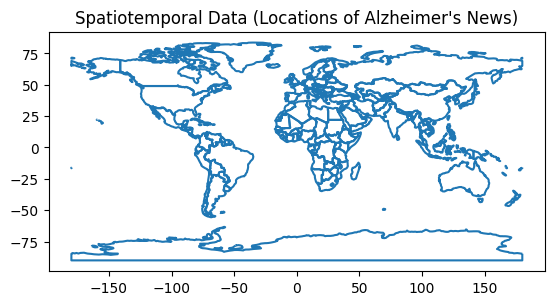

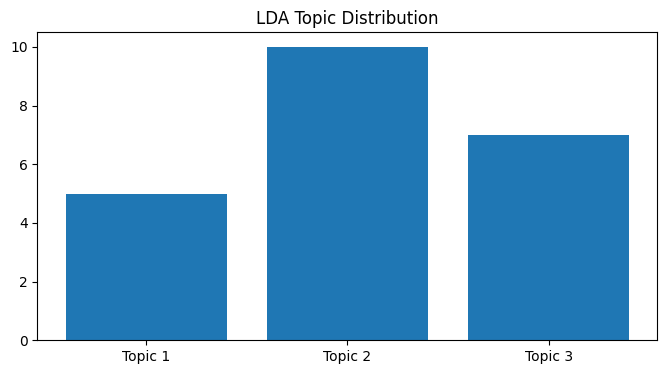

In [19]:
# Example usage:

# Step 1: Search and save news articles
saved_news = search_and_save_news()

# Step 2: Summarize news articles using Falconsai/text_summarization model
summaries = summarize_news(saved_news)

# Step 3: Extract spatiotemporal data
temporal_data, spatial_data = extract_spatiotemporal_data(summaries)

# Step 4: Perform LDA topic modeling on the summaries
topics = lda_topic_modeling(summaries)

# Step 5: Visualize the spatiotemporal data and LDA topics
plot_spatiotemporal_data(spatial_data)
plot_lda_topics()
